In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import b_value_functions1 as b_value_functions # these are the functions in the .py file 
from datetime import datetime
import statistics

In [3]:
ct = pd.read_csv(r'/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Documents/seismicity front bvs.csv')
#ct = pd.read_csv(r"C:\Users\Matthew Salinas\OneDrive - University of Southern California\Documents\seismicity front bvs.csv")

ct

,Catalog,90rbv,90rlbv,90rhbv,90rstdb,90pbv,90plbv,90phbv,90pstdb,90rbp,...,80phbv,80pstdb,80rbp,80rlbp,80rhbp,80rstdp,80pbp,80plbp,80phbp,80pstdp
0,SSFS1993,1.410022,1.396476,1.489293,0.022279,1.364401,1.312669,1.619658,0.084458,1.272742,...,1.355123,0.035132,1.472581,1.419401,1.531885,0.027818,1.524265,1.418477,1.629381,0.052607
1,SSFS1995,1.809751,1.695094,1.929829,0.060239,1.877740,1.551763,2.310357,0.190425,1.779781,...,2.463097,0.139246,2.047510,1.912437,2.181555,0.072638,2.066061,1.799416,2.420209,0.158285
2,SSFS1996,1.548635,1.482657,1.674053,0.049830,1.613104,1.310345,1.973054,0.167642,1.504362,...,2.180767,0.136180,1.617687,1.511882,1.737705,0.057017,1.754259,1.554647,2.002273,0.118711
3,SSFS2004,1.038246,0.949540,1.069123,0.034292,1.246412,1.103300,1.466453,0.092178,1.115937,...,0.608259,0.028783,0.521826,0.503311,0.541217,0.010197,0.609375,0.566407,0.657444,0.023778
4,Cooper 2003,0.830105,0.768661,0.844724,0.023882,0.847369,0.769364,0.902385,0.033968,0.945640,...,0.883644,0.023523,0.894529,0.875928,0.915570,0.010147,0.914387,0.875633,0.958903,0.021634
5,Cooper 2012,0.706146,0.695094,0.731905,0.009529,0.839455,0.789437,0.897441,0.027841,0.876532,...,0.839271,0.018411,0.855544,0.836301,0.875815,0.010495,0.965398,0.922695,1.015923,0.023169
6,Basel,1.202880,1.195359,1.211584,0.004059,1.370301,1.339531,1.402769,0.015824,1.359413,...,1.355123,0.035132,1.472581,1.419401,1.531885,0.027818,1.524265,1.418477,1.629381,0.052607
7,Forge 2022,1.065427,1.039468,1.106561,0.017707,1.712486,1.301790,1.942533,0.173355,1.196429,...,1.419706,0.048128,1.197434,1.158709,1.239466,0.020635,1.515406,1.383086,1.672324,0.074238


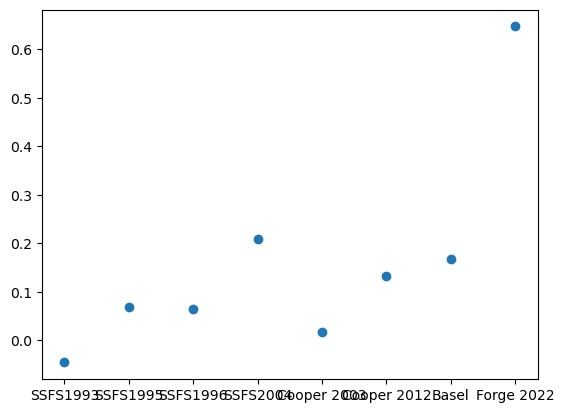

In [4]:
plt.scatter(ct['Catalog'],ct['90pbv']-ct['90rbv'])
plt.show()

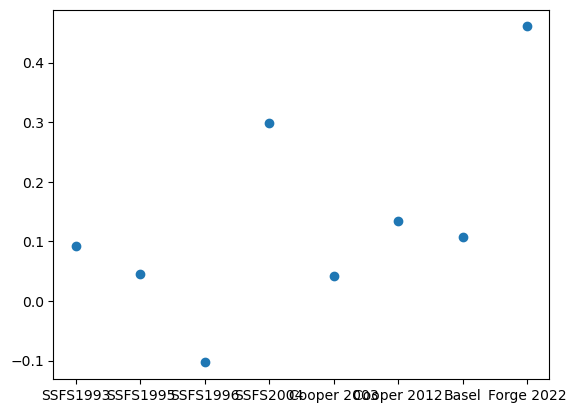

In [5]:
plt.scatter(ct['Catalog'],ct['90pbp']-ct['90rbp'])
plt.show()

In [4]:
ctA=np.array(ct)
ctA[:,0]

array(['SSFS1993', 'SSFS1995', 'SSFS1996', 'SSFS2004', 'Cooper 2003',
       'Cooper 2012', 'Basel', 'Forge 2022'], dtype=object)

In [5]:
# group with high seismic: C2012, SSFS 2004, Basel
# 5,3,6
hs =[]
ha = []
#group with high aseismic: S93, S95, S96, C2003
# 0,1,2,4
hs.append(ctA[3])
hs.append(ctA[5])
hs.append(ctA[6])

ha.append(ctA[0])
ha.append(ctA[1])
ha.append(ctA[2])
ha.append(ctA[4])
haA=np.array(ha)
hsA=np.array(hs)

In [19]:
import numpy as np
from scipy.stats import wilcoxon

# Central values and standard deviations
#t_stat, p_value = paired_t_test_with_error(ct['90pbp'], ct['90rbp'], ct['90pstdp'], ct['90rstdp'])
before_means = np.array(ct['90pbv'])
before_stds  = np.array(ct['90pstdb'])

after_means = np.array(ct['90rbv'])
after_stds  = np.array(ct['90rstdb'])

n_simulations = 10000
p_values = []

for _ in range(n_simulations):
    before_sim = np.random.normal(before_means, before_stds)
    after_sim  = np.random.normal(after_means, after_stds)
    try:
        stat, p = wilcoxon(before_sim, after_sim)
        p_values.append(p)
    except ValueError:
        continue  # if all differences are 0, skip

# Analyze distribution of p-values
median_p = np.median(p_values)
print(f"Median p-value: {median_p}")


Median p-value: 0.109375


In [20]:
print(np.mean(p_values))

0.1855796875


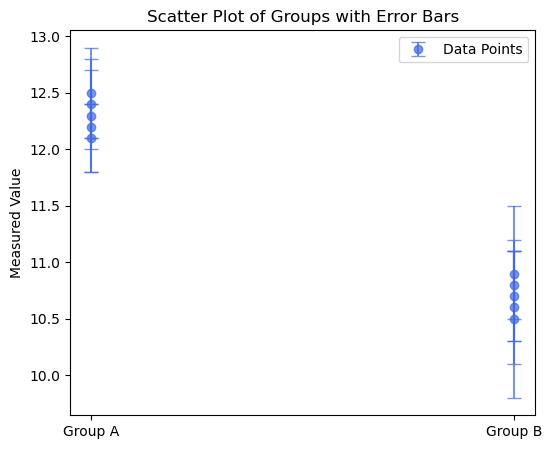

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Example data for two groups
group_labels = ["Group A"] * 5 + ["Group B"] * 5  # Labels for groups
x_positions = [1] * 5 + [2] * 5  # X positions for scatter plot
values = [12.1, 12.5, 12.2, 12.3, 12.4,  # Group A values
          10.6, 10.9, 10.7, 10.8, 10.5]  # Group B values
errors = [0.3, 0.4, 0.2, 0.5, 0.3,  # Group A errors
          0.5, 0.6, 0.4, 0.3, 0.7]  # Group B errors

# Create the figure
plt.figure(figsize=(6, 5))

# Scatter plot with error bars
plt.errorbar(x_positions, values, yerr=errors, fmt='o', capsize=5, 
             markersize=6, color='royalblue', alpha=0.7, label="Data Points")

# Adjust x-axis labels
plt.xticks([1, 2], ["Group A", "Group B"])

# Labels and title
plt.ylabel("Measured Value")
plt.title("Scatter Plot of Groups with Error Bars")
plt.legend()

# Show the plot
plt.show()


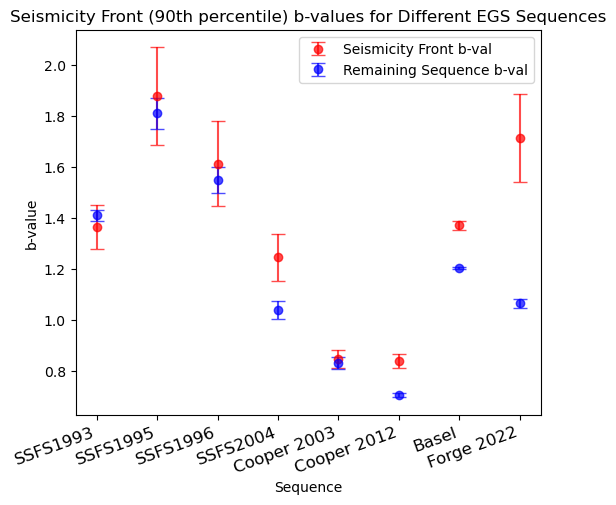

In [6]:
plt.figure(figsize=(6, 5))

plt.errorbar(ct['Catalog'], ct['90pbv'], yerr=ct['90pstdb'], fmt='o', capsize=5, markersize=6, color='r', alpha=0.7, label="Seismicity Front b-val")
plt.errorbar(ct['Catalog'], ct['90rbv'], yerr=ct['90rstdb'], fmt='o', capsize=5, markersize=6, color='b', alpha=0.7, label="Remaining Sequence b-val")
plt.xlabel("Sequence")
plt.ylabel("b-value")
plt.title("Seismicity Front (90th percentile) b-values for Different EGS Sequences")
plt.legend()
x_positions = np.arange(len(ct['Catalog'])) 
plt.xticks(x_positions, ct['Catalog'], rotation=20, ha='right', fontsize=12)
plt.show()

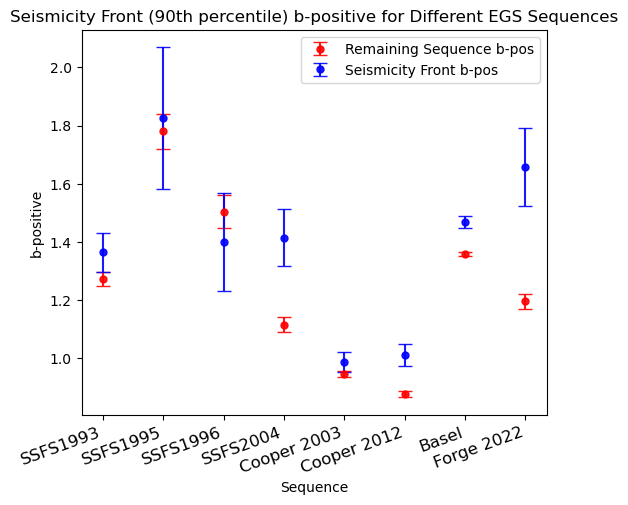

In [7]:
plt.figure(figsize=(6, 5))

plt.errorbar(ct['Catalog'], ct['90rbp'], yerr=ct['90rstdp'], fmt='o', capsize=5, markersize=5, color='r', alpha=0.9, label="Remaining Sequence b-pos")
plt.errorbar(ct['Catalog'], ct['90pbp'], yerr=ct['90pstdp'], fmt='o', capsize=5, markersize=5, color='b', alpha=0.9, label="Seismicity Front b-pos")

plt.xlabel("Sequence")
plt.ylabel("b-positive")
plt.title("Seismicity Front (90th percentile) b-positive for Different EGS Sequences")
plt.legend()
x_positions = np.arange(len(ct['Catalog'])) 
plt.xticks(x_positions, ct['Catalog'], rotation=20, ha='right', fontsize=12)
plt.show()

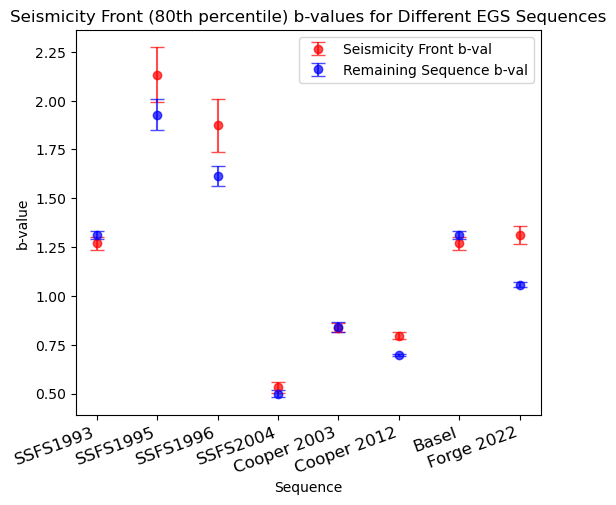

In [24]:
plt.figure(figsize=(6, 5))

plt.errorbar(ct['Catalog'], ct['80pbv'], yerr=ct['80pstdb'], fmt='o', capsize=5, markersize=6, color='r', alpha=0.7, label="Seismicity Front b-val")
plt.errorbar(ct['Catalog'], ct['80rbv'], yerr=ct['80rstdb'], fmt='o', capsize=5, markersize=6, color='b', alpha=0.7, label="Remaining Sequence b-val")
plt.xlabel("Sequence")
plt.ylabel("b-value")
plt.title("Seismicity Front (80th percentile) b-values for Different EGS Sequences")
plt.legend()
x_positions = np.arange(len(ct['Catalog'])) 
plt.xticks(x_positions, ct['Catalog'], rotation=20, ha='right', fontsize=12)
plt.show()

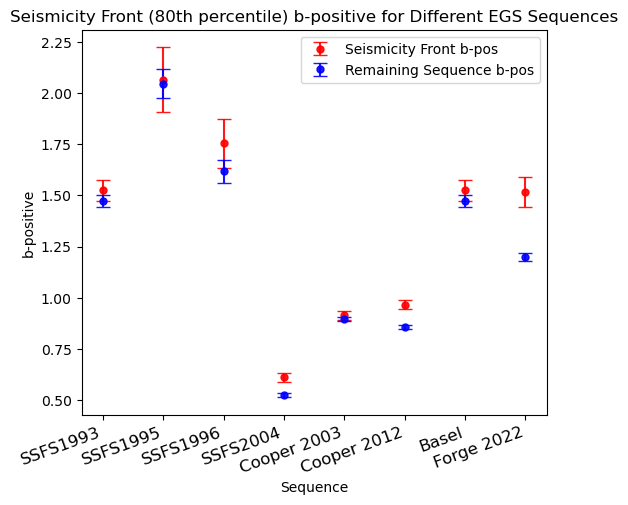

In [25]:
plt.figure(figsize=(6, 5))

plt.errorbar(ct['Catalog'], ct['80pbp'], yerr=ct['80pstdp'], fmt='o', capsize=5, markersize=5, color='r', alpha=0.9, label="Seismicity Front b-pos")
plt.errorbar(ct['Catalog'], ct['80rbp'], yerr=ct['80rstdp'], fmt='o', capsize=5, markersize=5, color='b', alpha=0.9, label="Remaining Sequence b-pos")
plt.xlabel("Sequence")
plt.ylabel("b-positive")
plt.title("Seismicity Front (80th percentile) b-positive for Different EGS Sequences")
plt.legend()
x_positions = np.arange(len(ct['Catalog'])) 
plt.xticks(x_positions, ct['Catalog'], rotation=20, ha='right', fontsize=12)
plt.show()

In [21]:
ctcNew =[ct['Catalog'][0],ct['Catalog'][1],ct['Catalog'][2],ct['Catalog'][4],ct['Catalog'][3],"Basel 2006",ct['Catalog'][5],ct['Catalog'][7]]
ctrbNew =[ct['90rbp'][0],ct['90rbp'][1],ct['90rbp'][2],ct['90rbp'][4],ct['90rbp'][3],ct['90rbp'][6],ct['90rbp'][5],ct['90rbp'][7]]
ctpbNew =[ct['90pbp'][0],ct['90pbp'][1],ct['90pbp'][2],ct['90pbp'][4],ct['90pbp'][3],ct['90pbp'][6],ct['90pbp'][5],ct['90pbp'][7]]
ctrsNew =[ct['90rstdp'][0],ct['90rstdp'][1],ct['90rstdp'][2],ct['90rstdp'][4],ct['90rstdp'][3],ct['90rstdp'][6],ct['90rstdp'][5],ct['90rstdp'][7]]
ctpsNew =[ct['90pstdp'][0],ct['90pstdp'][1],ct['90pstdp'][2],ct['90pstdp'][4],ct['90pstdp'][3],ct['90pstdp'][6],ct['90pstdp'][5],ct['90pstdp'][7]]

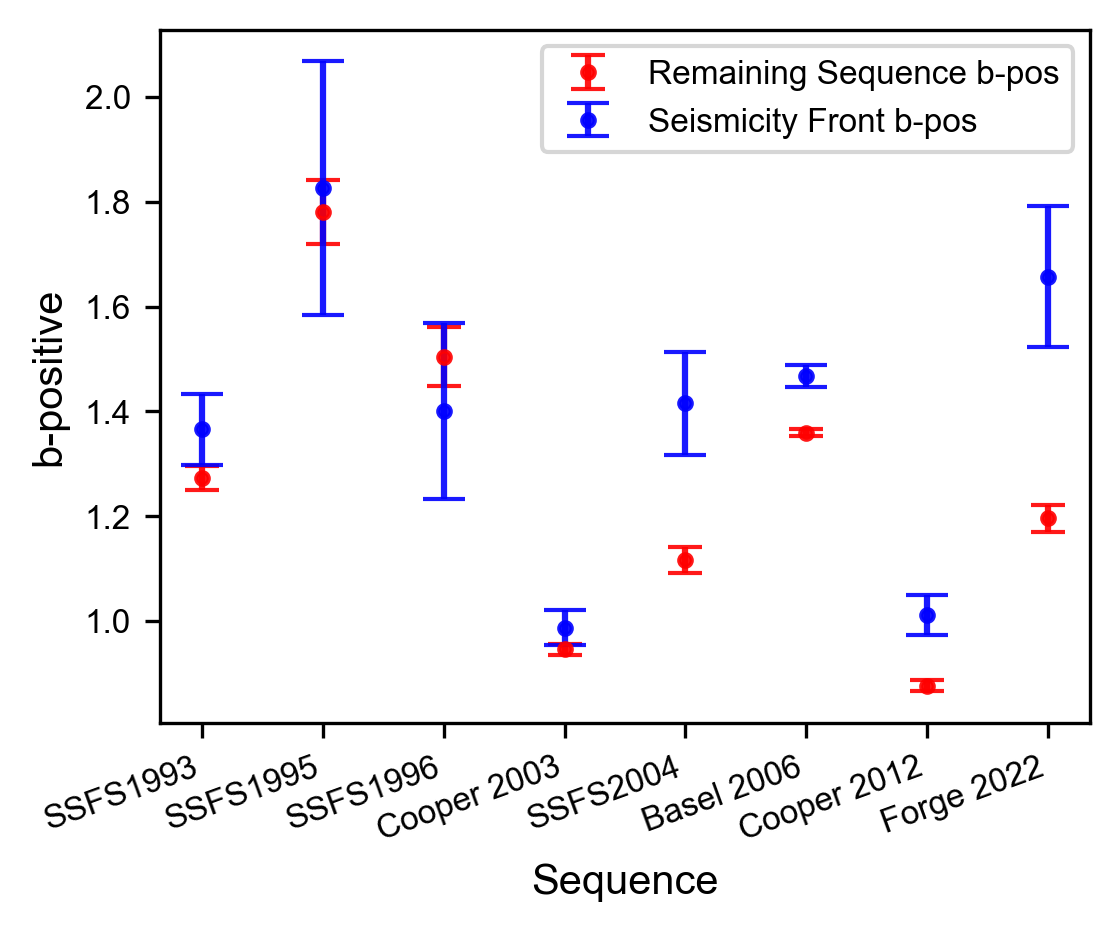

In [22]:
fig, ax1 = plt.subplots(figsize=(4, 3),dpi=300)
plt.rcParams['font.family'] = 'Arial'
plt.errorbar(ctcNew, ctrbNew, yerr=ctrsNew, fmt='o', capsize=4, markersize=3, color='r', alpha=0.9, label="Remaining Sequence b-pos")
plt.errorbar(ctcNew, ctpbNew, yerr=ctpsNew, fmt='o', capsize=5, markersize=3, color='b', alpha=0.9, label="Seismicity Front b-pos")

plt.xlabel("Sequence",fontsize=10)
plt.ylabel("b-positive",fontsize=10)
#plt.title("Seismicity Front (90th percentile) b-positive for Different EGS Sequences")
plt.legend(fontsize=8)
x_positions = np.arange(len(ctcNew)) 
plt.yticks(fontsize=8) 
plt.xticks(x_positions, ctcNew, rotation=20, ha='right', fontsize=8)
plt.show()
fig.savefig(r"C:\Users\Matthew Salinas\OneDrive - University of Southern California\Yihe\Manuscripting\Fig 7 New\fig 7 order.png",bbox_inches='tight', pad_inches=0.05)

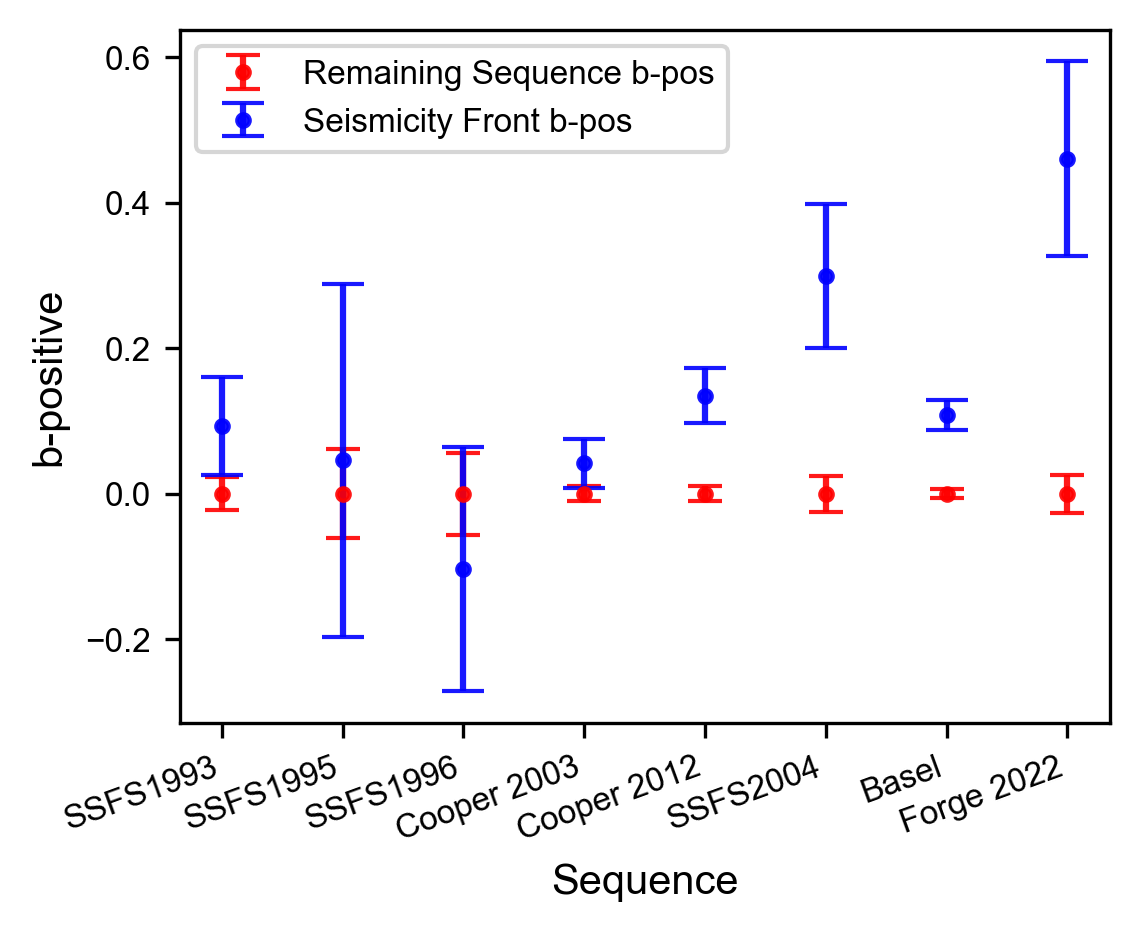

In [8]:
fig, ax1 = plt.subplots(figsize=(4, 3),dpi=300)
plt.rcParams['font.family'] = 'Arial'
plt.errorbar(ctcNew, np.array(ctrbNew)-np.array(ctrbNew), yerr=ctrsNew, fmt='o', capsize=4, markersize=3, color='r', alpha=0.9, label="Remaining Sequence b-pos")
plt.errorbar(ctcNew, np.array(ctpbNew)-np.array(ctrbNew), yerr=ctpsNew, fmt='o', capsize=5, markersize=3, color='b', alpha=0.9, label="Seismicity Front b-pos")

plt.xlabel("Sequence",fontsize=10)
plt.ylabel("b-positive",fontsize=10)
#plt.title("Seismicity Front (90th percentile) b-positive for Different EGS Sequences")
plt.legend(fontsize=8)
x_positions = np.arange(len(ctcNew)) 
plt.yticks(fontsize=8) 
plt.xticks(x_positions, ctcNew, rotation=20, ha='right', fontsize=8)
plt.show()
#fig.savefig(r"D:\Yihe\Manuscripting\seismicity front bp figure.png",bbox_inches='tight', pad_inches=0.05)

In [9]:
ctc2 =[ct['Catalog'][1],ct['Catalog'][2],ct['Catalog'][0],ct['Catalog'][5],ct['Catalog'][6]]
ctrb2 =[ct['90rbp'][1],ct['90rbp'][2],ct['90rbp'][0],ct['90rbp'][5],ct['90rbp'][6]]
ctpb2 =[ct['90pbp'][1],ct['90pbp'][2],ct['90pbp'][0],ct['90pbp'][5],ct['90pbp'][6]]
ctrs2 =[ct['90rstdp'][1],ct['90rstdp'][2],ct['90rstdp'][0],ct['90rstdp'][5],ct['90rstdp'][6]]
ctps2 =[ct['90pstdp'][1],ct['90pstdp'][2],ct['90pstdp'][0],ct['90pstdp'][5],ct['90pstdp'][6]]

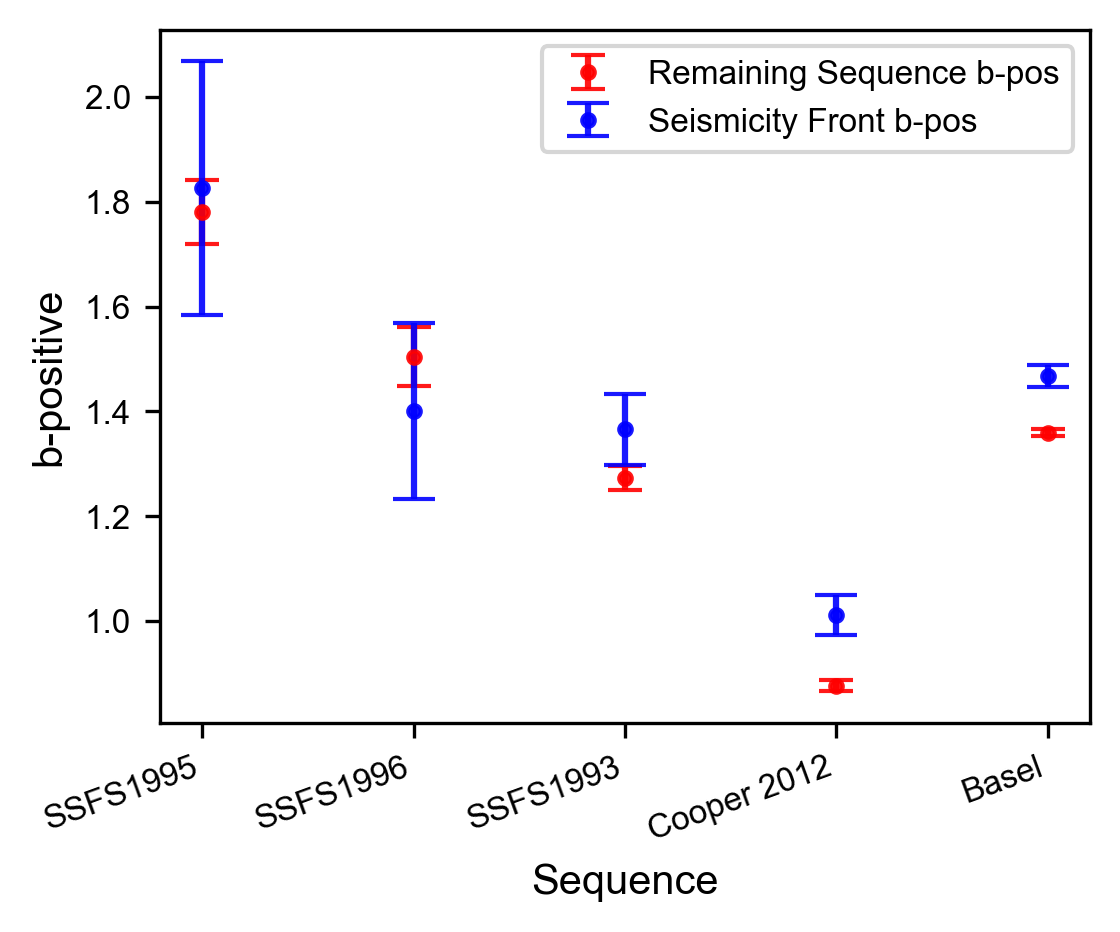

In [10]:
fig, ax1 = plt.subplots(figsize=(4, 3),dpi=300)
plt.rcParams['font.family'] = 'Arial'
plt.errorbar(ctc2, ctrb2, yerr=ctrs2, fmt='o', capsize=4, markersize=3, color='r', alpha=0.9, label="Remaining Sequence b-pos")
plt.errorbar(ctc2, ctpb2, yerr=ctps2, fmt='o', capsize=5, markersize=3, color='b', alpha=0.9, label="Seismicity Front b-pos")

plt.xlabel("Sequence",fontsize=10)
plt.ylabel("b-positive",fontsize=10)
#plt.title("Seismicity Front (90th percentile) b-positive for Different EGS Sequences")
plt.legend(fontsize=8)
x_positions = np.arange(len(ctc2)) 
plt.yticks(fontsize=8) 
plt.xticks(x_positions, ctc2, rotation=20, ha='right', fontsize=8)
plt.show()
#fig.savefig(r"D:\Yihe\Manuscripting\seismicity front bp figure.png",bbox_inches='tight', pad_inches=0.05)

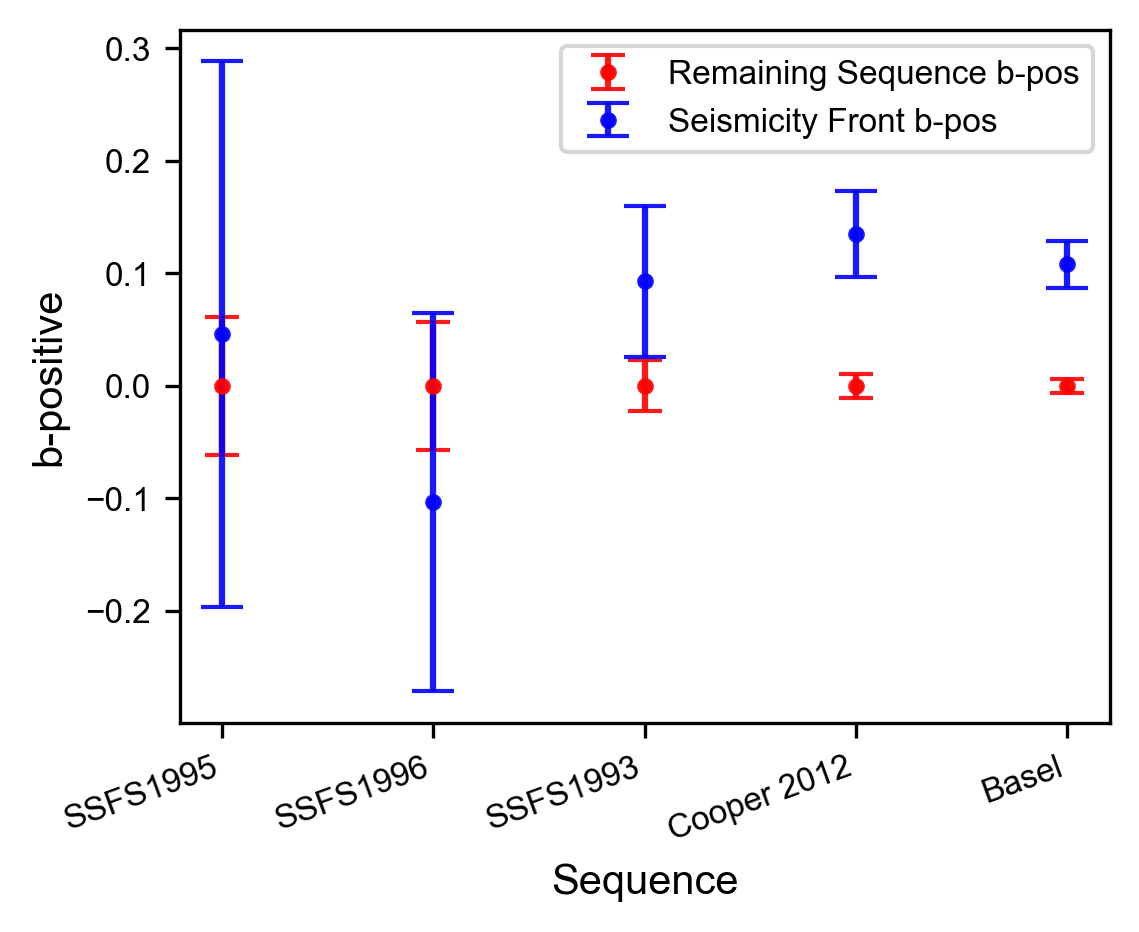

In [8]:
fig, ax1 = plt.subplots(figsize=(4, 3),dpi=300)
plt.rcParams['font.family'] = 'Arial'
plt.errorbar(ctc2, np.array(ctrb2)-np.array(ctrb2), yerr=ctrs2, fmt='o', capsize=4, markersize=3, color='r', alpha=0.9, label="Remaining Sequence b-pos")
plt.errorbar(ctc2, np.array(ctpb2)-np.array(ctrb2), yerr=ctps2, fmt='o', capsize=5, markersize=3, color='b', alpha=0.9, label="Seismicity Front b-pos")

plt.xlabel("Sequence",fontsize=10)
plt.ylabel("b-positive",fontsize=10)
#plt.title("Seismicity Front (90th percentile) b-positive for Different EGS Sequences")
plt.legend(fontsize=8)
x_positions = np.arange(len(ctc2)) 
plt.yticks(fontsize=8) 
plt.xticks(x_positions, ctc2, rotation=20, ha='right', fontsize=8)
plt.show()
#fig.savefig(r"D:\Yihe\Manuscripting\seismicity front bp figure.png",bbox_inches='tight', pad_inches=0.05)

In [5]:
ctc3 =[-3.8,-3.1,-2,0.35,0.4,-0.95]
ctrb3 =[ct['90rbp'][1],ct['90rbp'][2],ct['90rbp'][0],ct['90rbp'][5],ct['90rbp'][6],ct['90rbp'][4]]
ctpb3 =[ct['90pbp'][1],ct['90pbp'][2],ct['90pbp'][0],ct['90pbp'][5],ct['90pbp'][6],ct['90pbp'][4]]
ctrs3 =[ct['90rstdp'][1],ct['90rstdp'][2],ct['90rstdp'][0],ct['90rstdp'][5],ct['90rstdp'][6],ct['90rstdp'][4]]
ctps3 =[ct['90pstdp'][1],ct['90pstdp'][2],ct['90pstdp'][0],ct['90pstdp'][5],ct['90pstdp'][6],ct['90pstdp'][4]]

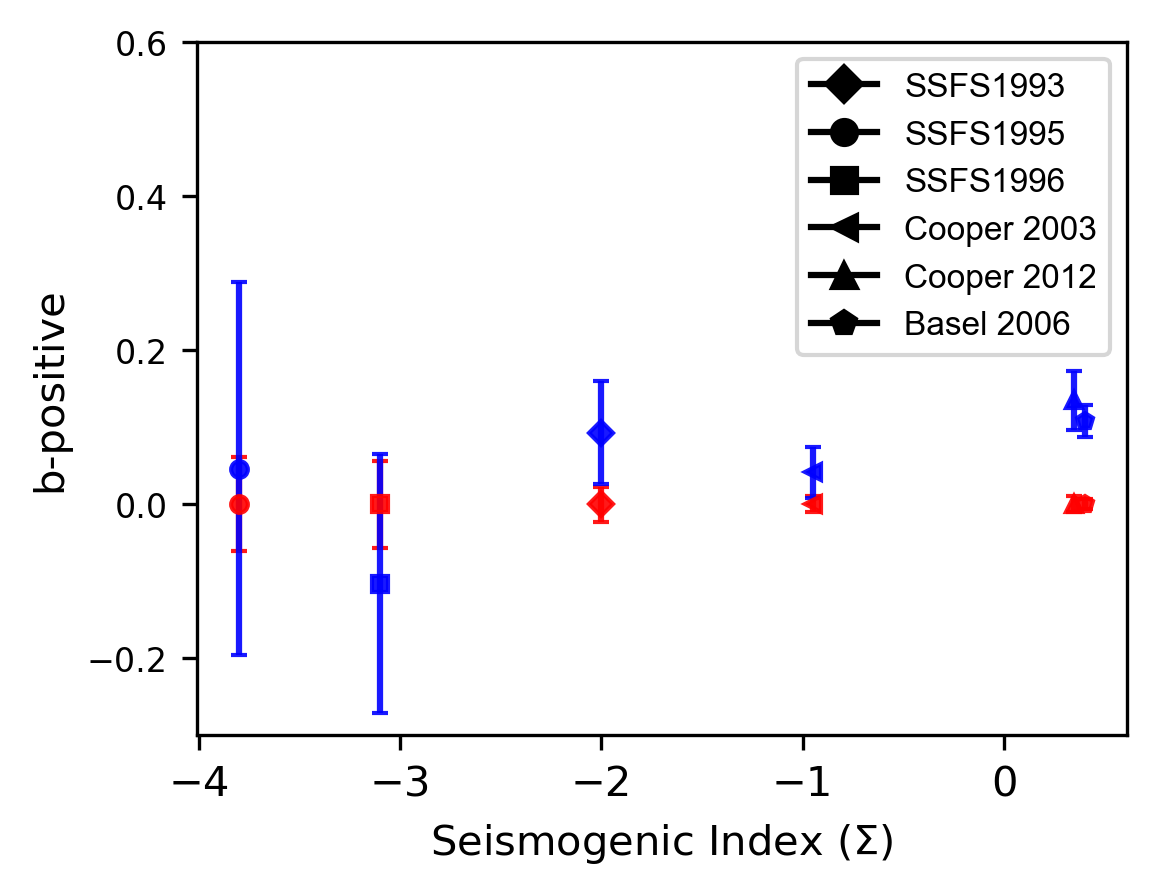

In [6]:
fig, ax1 = plt.subplots(figsize=(4, 3),dpi=300)
plt.rcParams['font.family'] = 'Arial'
#plt.errorbar(ctc3, np.array(ctrb3)-np.array(ctrb3), yerr=ctrs3, fmt='o', capsize=4, markersize=3, color='r', alpha=0.9, label="Remaining Sequence b-pos")
#plt.errorbar(ctc3, np.array(ctpb3)-np.array(ctrb3), yerr=ctps3, fmt='o', capsize=5, markersize=3, color='b', alpha=0.9, label="Seismicity Front b-pos")

labels = ["SSFS1995","SSFS1996","SSFS1993","Cooper 2012","Basel 2006","Cooper 2003",]

# List of markers (enough variety for points)
markers = ['o', 's', 'D', '^', 'p', '<', '>', 'p', '*', 'h', 'x', '+']

handles = []

for i, (ctc, ctrb, ctrs,ctpb,ctps,label) in enumerate(zip(ctc3, ctrb3,ctrs3,ctpb3,ctps3, labels)):
    plt.errorbar(ctc, np.array(ctrb)-np.array(ctrb), yerr=ctrs, marker=markers[i], capsize=2, markersize=4, color='r', alpha=0.9,label=None)
    plt.errorbar(ctc, np.array(ctpb)-np.array(ctrb), yerr=ctps, marker=markers[i], capsize=2, markersize=4, color='b', alpha=0.9, label=None)

    handle = plt.Line2D([0], [0], marker=markers[i], color='k',markerfacecolor='k', markersize=6, label=label)
    handles.append(handle)

handNew = [handles[2],handles[0],handles[1],handles[5],handles[3],handles[4]]
labNew = [labels[2],labels[0],labels[1],labels[5],labels[3],labels[4]]
plt.xlabel("Seismogenic Index ($\Sigma$)",fontsize=10)
plt.ylabel("b-positive",fontsize=10)
#plt.title("Seismicity Front (90th percentile) b-positive for Different EGS Sequences")
ax1.legend(handles=handNew, labels=labNew, fontsize=8,loc='upper right')
#plt.legend(fontsize=8)
plt.yticks(fontsize=8) 
plt.ylim(-0.3,0.6)
#plt.xticks(x_positions, ctc2, rotation=20, ha='right', fontsize=8)
plt.show()
#fig.savefig(r"D:\Yihe\Manuscripting\seismicity front bp figure.png",bbox_inches='tight', pad_inches=0.05)
#fig.savefig(r"C:\Users\Matthew Salinas\OneDrive - University of Southern California\Yihe\Manuscripting\Fig 7 New\fig 7 SI.png",bbox_inches='tight', pad_inches=0.05)
#print(handles)

In [ ]:
# Calculate the correlation coefficient matrix
como = np.corrcoef(list1, list2)

# Extract the Pearson correlation coefficient
pearco = como[0, 1]

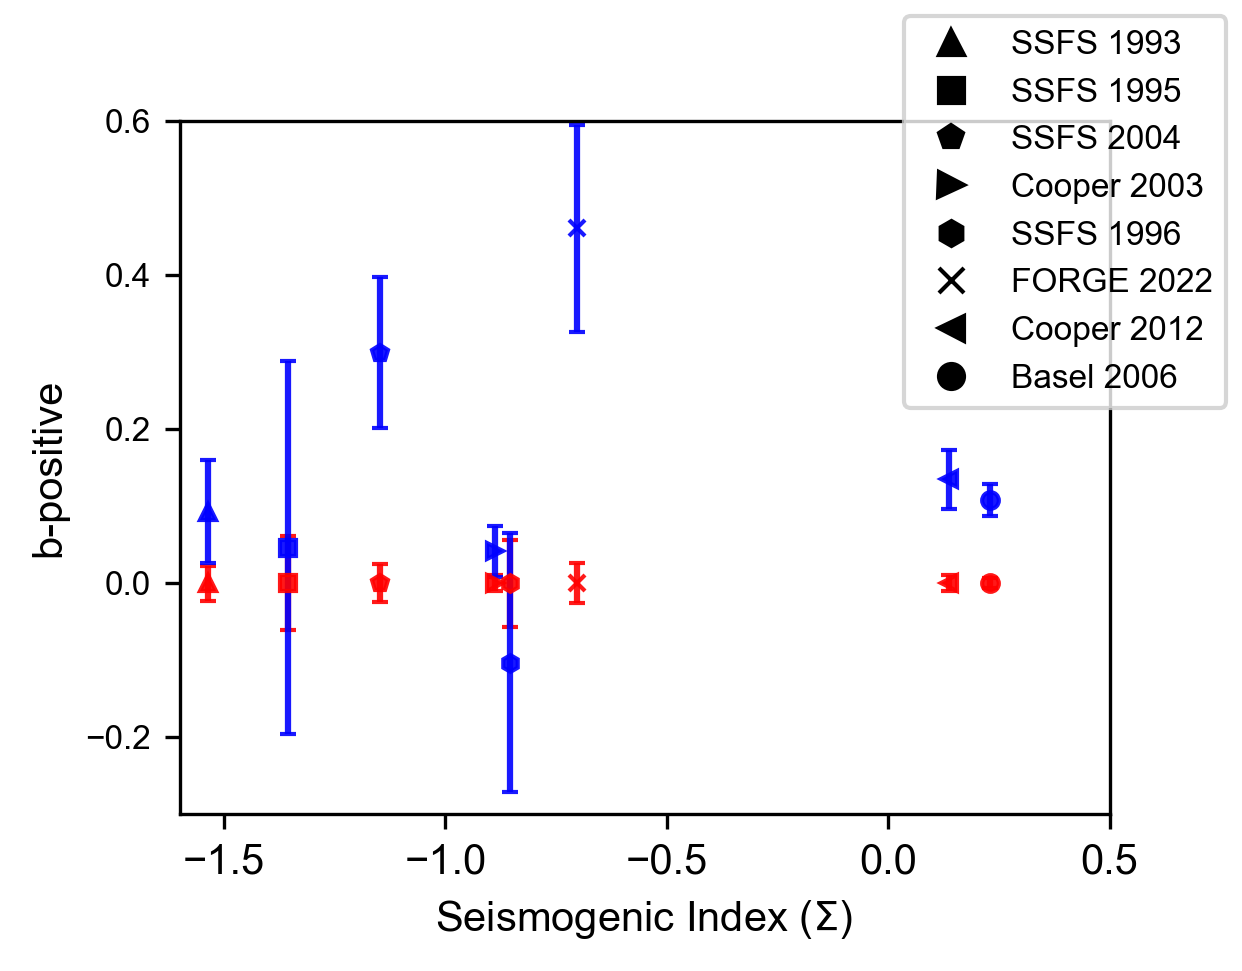

[[1.         0.06150815]
 [0.06150815 1.        ]]
0.06150815373756585


In [25]:
SI = [-1.535022, -1.354143, -0.853596, -1.147869, -0.888451, 0.136697, 0.230634, -0.702418]

fig, ax1 = plt.subplots(figsize=(4, 3),dpi=300)
plt.rcParams['font.family'] = 'Arial'
#plt.errorbar(ctc3, np.array(ctrb3)-np.array(ctrb3), yerr=ctrs3, fmt='o', capsize=4, markersize=3, color='r', alpha=0.9, label="Remaining Sequence b-pos")
#plt.errorbar(ctc3, np.array(ctpb3)-np.array(ctrb3), yerr=ctps3, fmt='o', capsize=5, markersize=3, color='b', alpha=0.9, label="Seismicity Front b-pos")

labels = ["SSFS 1993","SSFS 1995","SSFS 1996","SSFS 2004", "Cooper 2003","Cooper 2012","Basel 2006","FORGE 2022"]

# List of markers (enough variety for points)
markers = ['^', 's', 'h', 'p', '>', '<', 'o', 'x', '*', 'h', 'x', '+']

handles = []

for i in range(len(SI)):
    plt.errorbar(SI[i], np.array(ct['90rbp'][i])-np.array(ct['90rbp'][i]), yerr=ct['90rstdp'][i], marker=markers[i], capsize=2, markersize=4, color='r', alpha=0.9,label=None)
    plt.errorbar(SI[i], np.array(ct['90pbp'][i])-np.array(ct['90rbp'][i]), yerr=ct['90pstdp'][i], marker=markers[i], capsize=2, markersize=4, color='b', alpha=0.9, label=None)

    handle = plt.Line2D([0], [0], marker=markers[i], color='w',markerfacecolor='k',markeredgecolor='k', markersize=6, label=label)
    handles.append(handle)

##### HERE CORRECT HERE
handNew = [handles[0],handles[1],handles[3],handles[4],handles[2],handles[-1],handles[5],handles[6]]
labNew = [labels[0],labels[1],labels[3],labels[4],labels[2],labels[-1],labels[5],labels[6]]
plt.xlabel("Seismogenic Index ($\Sigma$)",fontsize=10)
plt.ylabel("b-positive",fontsize=10)
#plt.title("Seismicity Front (90th percentile) b-positive for Different EGS Sequences")
fig.legend(handles=handNew, labels=labNew, fontsize=8,loc='upper right')
#plt.legend(fontsize=8)
plt.yticks(fontsize=8) 
plt.ylim(-0.3,0.6)
plt.xlim(-1.6,0.5)
#plt.xticks(x_positions, ctc2, rotation=20, ha='right', fontsize=8)
plt.show()
#fig.savefig(r"D:\Yihe\Manuscripting\seismicity front bp figure.png",bbox_inches='tight', pad_inches=0.05)
fig.savefig(r"C:\Users\Matthew Salinas\OneDrive - University of Southern California\Yihe\Manuscripting\Fig 7 New\fig 7 compare\fig 7 SI Inj.png",bbox_inches='tight', pad_inches=0.05)
#print(handles)

# Calculate the correlation coefficient matrix
como = np.corrcoef(SI, np.array(ct['90pbp'])-np.array(ct['90rbp']))
print(como)
# Extract the Pearson correlation coefficient
pearco = como[0, 1]
print(pearco)

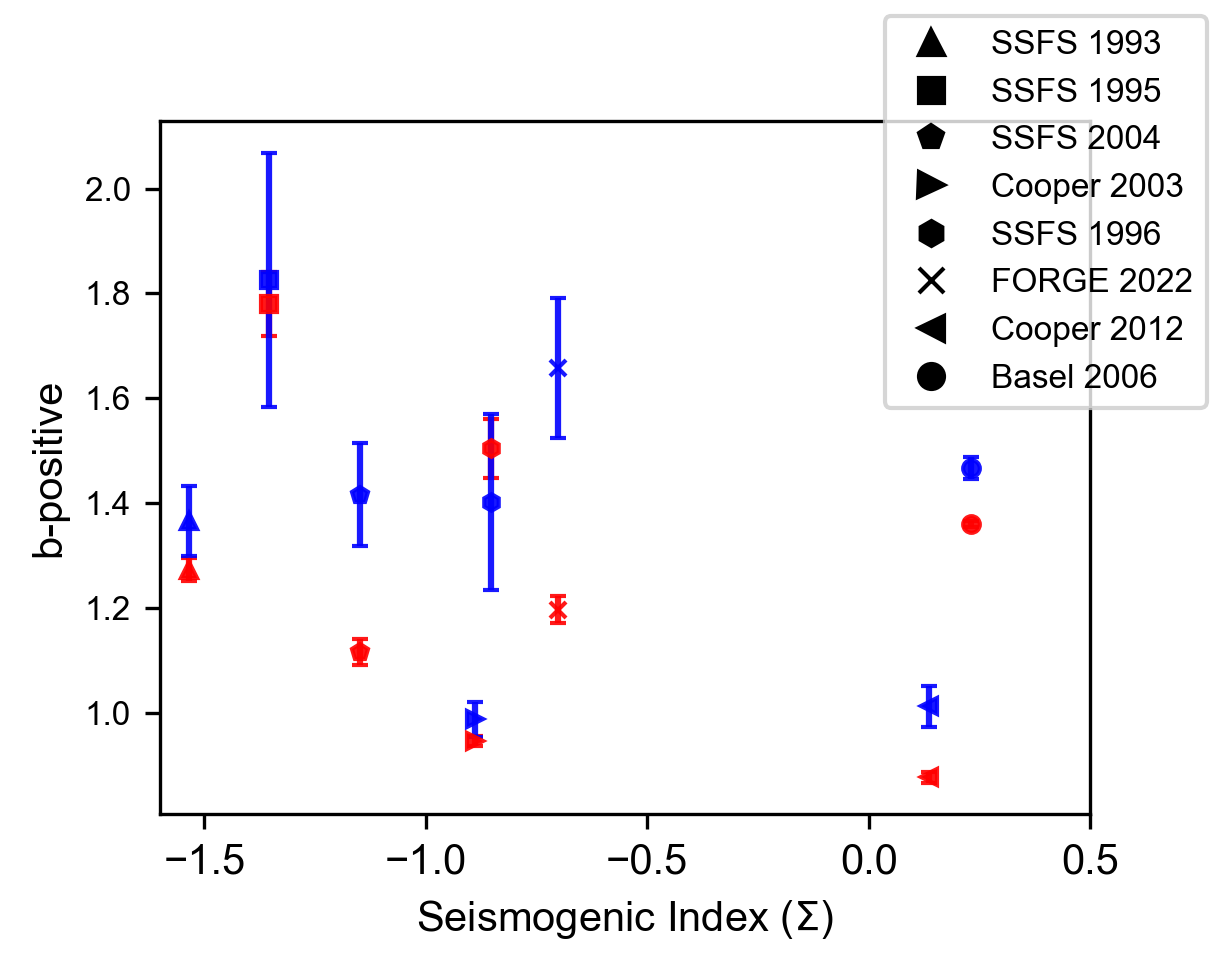

In [8]:
SI = [-1.535022, -1.354143, -0.853596, -1.147869, -0.888451, 0.136697, 0.230634, -0.702418]

fig, ax1 = plt.subplots(figsize=(4, 3),dpi=300)
plt.rcParams['font.family'] = 'Arial'
#plt.errorbar(ctc3, np.array(ctrb3)-np.array(ctrb3), yerr=ctrs3, fmt='o', capsize=4, markersize=3, color='r', alpha=0.9, label="Remaining Sequence b-pos")
#plt.errorbar(ctc3, np.array(ctpb3)-np.array(ctrb3), yerr=ctps3, fmt='o', capsize=5, markersize=3, color='b', alpha=0.9, label="Seismicity Front b-pos")

labels = ["SSFS 1993","SSFS 1995","SSFS 1996","SSFS 2004", "Cooper 2003","Cooper 2012","Basel 2006","FORGE 2022"]

# List of markers (enough variety for points)
markers = ['^', 's', 'h', 'p', '>', '<', 'o', 'x', '*', 'h', 'x', '+']

handles = []

for i in range(len(SI)):
    plt.errorbar(SI[i], np.array(ct['90rbp'][i]), yerr=ct['90rstdp'][i], marker=markers[i], capsize=2, markersize=4, color='r', alpha=0.9,label=None)
    plt.errorbar(SI[i], np.array(ct['90pbp'][i]), yerr=ct['90pstdp'][i], marker=markers[i], capsize=2, markersize=4, color='b', alpha=0.9, label=None)

    handle = plt.Line2D([0], [0], marker=markers[i], color='w',markerfacecolor='k',markeredgecolor='k', markersize=6, label=label)
    handles.append(handle)

##### HERE CORRECT HERE
handNew = [handles[0],handles[1],handles[3],handles[4],handles[2],handles[-1],handles[5],handles[6]]
labNew = [labels[0],labels[1],labels[3],labels[4],labels[2],labels[-1],labels[5],labels[6]]
plt.xlabel("Seismogenic Index ($\Sigma$)",fontsize=10)
plt.ylabel("b-positive",fontsize=10)
#plt.title("Seismicity Front (90th percentile) b-positive for Different EGS Sequences")
fig.legend(handles=handNew, labels=labNew, fontsize=8,loc='upper right')
#plt.legend(fontsize=8)
plt.yticks(fontsize=8) 
#plt.ylim(-0.3,0.6)
plt.xlim(-1.6,0.5)
#plt.xticks(x_positions, ctc2, rotation=20, ha='right', fontsize=8)
plt.show()
#fig.savefig(r"D:\Yihe\Manuscripting\seismicity front bp figure.png",bbox_inches='tight', pad_inches=0.05)
#fig.savefig(r"C:\Users\Matthew Salinas\OneDrive - University of Southern California\Yihe\Manuscripting\Fig 7 New\fig 7 SI v2.png",bbox_inches='tight', pad_inches=0.05)
#print(handles)

####### RETRY SI FULL #######

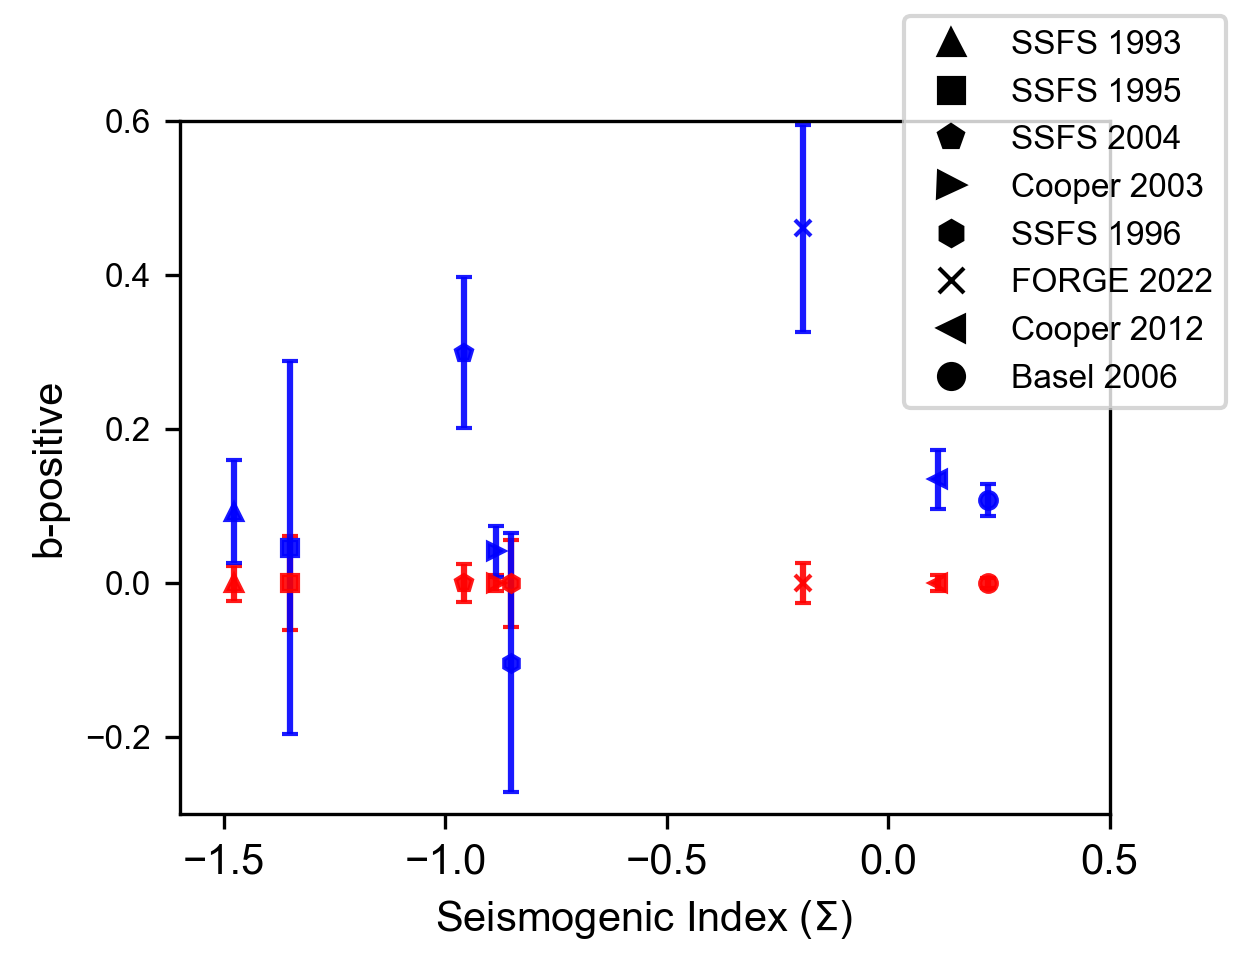

[[1.         0.31003977]
 [0.31003977 1.        ]]
0.3100397693156553


In [24]:
SI = [-1.476212, -1.349594, -0.852161, -0.958801, -0.884901, 0.11201, 0.225235, -0.191604]

fig, ax1 = plt.subplots(figsize=(4, 3),dpi=300)
plt.rcParams['font.family'] = 'Arial'
#plt.errorbar(ctc3, np.array(ctrb3)-np.array(ctrb3), yerr=ctrs3, fmt='o', capsize=4, markersize=3, color='r', alpha=0.9, label="Remaining Sequence b-pos")
#plt.errorbar(ctc3, np.array(ctpb3)-np.array(ctrb3), yerr=ctps3, fmt='o', capsize=5, markersize=3, color='b', alpha=0.9, label="Seismicity Front b-pos")

labels = ["SSFS 1993","SSFS 1995","SSFS 1996","SSFS 2004", "Cooper 2003","Cooper 2012","Basel 2006","FORGE 2022"]

# List of markers (enough variety for points)
markers = ['^', 's', 'h', 'p', '>', '<', 'o', 'x', '*', 'h', 'x', '+']

handles = []

for i in range(len(SI)):
    plt.errorbar(SI[i], np.array(ct['90rbp'][i])-np.array(ct['90rbp'][i]), yerr=ct['90rstdp'][i], marker=markers[i], capsize=2, markersize=4, color='r', alpha=0.9,label=None)
    plt.errorbar(SI[i], np.array(ct['90pbp'][i])-np.array(ct['90rbp'][i]), yerr=ct['90pstdp'][i], marker=markers[i], capsize=2, markersize=4, color='b', alpha=0.9, label=None)

    handle = plt.Line2D([0], [0], marker=markers[i], color='w',markerfacecolor='k',markeredgecolor='k', markersize=6, label=label)
    handles.append(handle)

##### HERE CORRECT HERE
handNew = [handles[0],handles[1],handles[3],handles[4],handles[2],handles[-1],handles[5],handles[6]]
labNew = [labels[0],labels[1],labels[3],labels[4],labels[2],labels[-1],labels[5],labels[6]]
plt.xlabel("Seismogenic Index ($\Sigma$)",fontsize=10)
plt.ylabel("b-positive",fontsize=10)
#plt.title("Seismicity Front (90th percentile) b-positive for Different EGS Sequences")
fig.legend(handles=handNew, labels=labNew, fontsize=8,loc='upper right')
#plt.legend(fontsize=8)
plt.yticks(fontsize=8) 
plt.ylim(-0.3,0.6)
plt.xlim(-1.6,0.5)
#plt.xticks(x_positions, ctc2, rotation=20, ha='right', fontsize=8)
plt.show()
#fig.savefig(r"D:\Yihe\Manuscripting\seismicity front bp figure.png",bbox_inches='tight', pad_inches=0.05)
fig.savefig(r"C:\Users\Matthew Salinas\OneDrive - University of Southern California\Yihe\Manuscripting\Fig 7 New\fig 7 compare\fig 7 SI Full.png",bbox_inches='tight', pad_inches=0.05)
#print(handles)

# Calculate the correlation coefficient matrix
como = np.corrcoef(SI, np.array(ct['90pbp'])-np.array(ct['90rbp']))
print(como)
# Extract the Pearson correlation coefficient
pearco = como[0, 1]
print(pearco)

####### EFFECTIVE STRESS DROP INJECTION#######

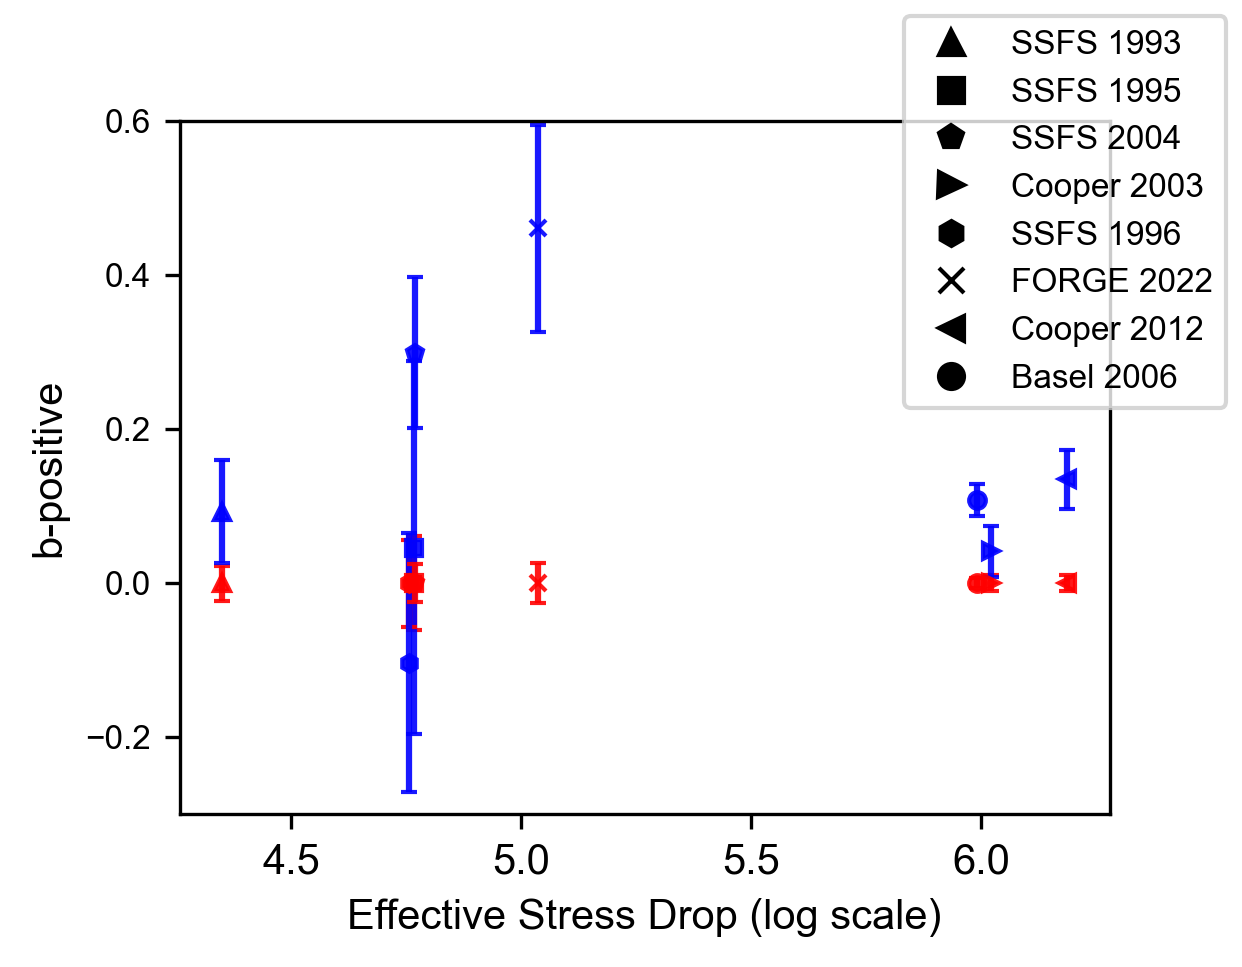

[[ 1.         -0.04864762]
 [-0.04864762  1.        ]]
-0.04864761550681772


In [26]:
import math
EStD = [22338.828008, 58456.982921, 56905.962938, 58766.100564, 1050124.218787, 1538316.096840, 979897.362509, 108473.099950]
lgEStD = [math.log10(x) for x in EStD]
fig, ax1 = plt.subplots(figsize=(4, 3),dpi=300)
plt.rcParams['font.family'] = 'Arial'
#plt.errorbar(ctc3, np.array(ctrb3)-np.array(ctrb3), yerr=ctrs3, fmt='o', capsize=4, markersize=3, color='r', alpha=0.9, label="Remaining Sequence b-pos")
#plt.errorbar(ctc3, np.array(ctpb3)-np.array(ctrb3), yerr=ctps3, fmt='o', capsize=5, markersize=3, color='b', alpha=0.9, label="Seismicity Front b-pos")

labels = ["SSFS 1993","SSFS 1995","SSFS 1996","SSFS 2004", "Cooper 2003","Cooper 2012","Basel 2006","FORGE 2022"]

# List of markers (enough variety for points)
markers = ['^', 's', 'h', 'p', '>', '<', 'o', 'x', '*', 'h', 'x', '+']

handles = []

for i in range(len(lgEStD)):
    plt.errorbar(lgEStD[i], np.array(ct['90rbp'][i])-np.array(ct['90rbp'][i]), yerr=ct['90rstdp'][i], marker=markers[i], capsize=2, markersize=4, color='r', alpha=0.9,label=None)
    plt.errorbar(lgEStD[i], np.array(ct['90pbp'][i])-np.array(ct['90rbp'][i]), yerr=ct['90pstdp'][i], marker=markers[i], capsize=2, markersize=4, color='b', alpha=0.9, label=None)

    handle = plt.Line2D([0], [0], marker=markers[i], color='w',markerfacecolor='k',markeredgecolor='k', markersize=6, label=label)
    handles.append(handle)

##### HERE CORRECT HERE
handNew = [handles[0],handles[1],handles[3],handles[4],handles[2],handles[-1],handles[5],handles[6]]
labNew = [labels[0],labels[1],labels[3],labels[4],labels[2],labels[-1],labels[5],labels[6]]
plt.xlabel("Effective Stress Drop (log scale)",fontsize=10)
plt.ylabel("b-positive",fontsize=10)
#plt.title("Seismicity Front (90th percentile) b-positive for Different EGS Sequences")
fig.legend(handles=handNew, labels=labNew, fontsize=8,loc='upper right')
#plt.legend(fontsize=8)
plt.yticks(fontsize=8) 
plt.ylim(-0.3,0.6)
#plt.xlim(-1.6,0.5)
#plt.xticks(x_positions, ctc2, rotation=20, ha='right', fontsize=8)
plt.show()
#fig.savefig(r"D:\Yihe\Manuscripting\seismicity front bp figure.png",bbox_inches='tight', pad_inches=0.05)
fig.savefig(r"C:\Users\Matthew Salinas\OneDrive - University of Southern California\Yihe\Manuscripting\Fig 7 New\fig 7 compare\fig 7 efSt Inj.png",bbox_inches='tight', pad_inches=0.05)
#print(handles)

# Calculate the correlation coefficient matrix
como = np.corrcoef(lgEStD, np.array(ct['90pbp'])-np.array(ct['90rbp']))
print(como)
# Extract the Pearson correlation coefficient
pearco = como[0, 1]
print(pearco)

####### EFFECTIVE STRESS DROP FULL#######

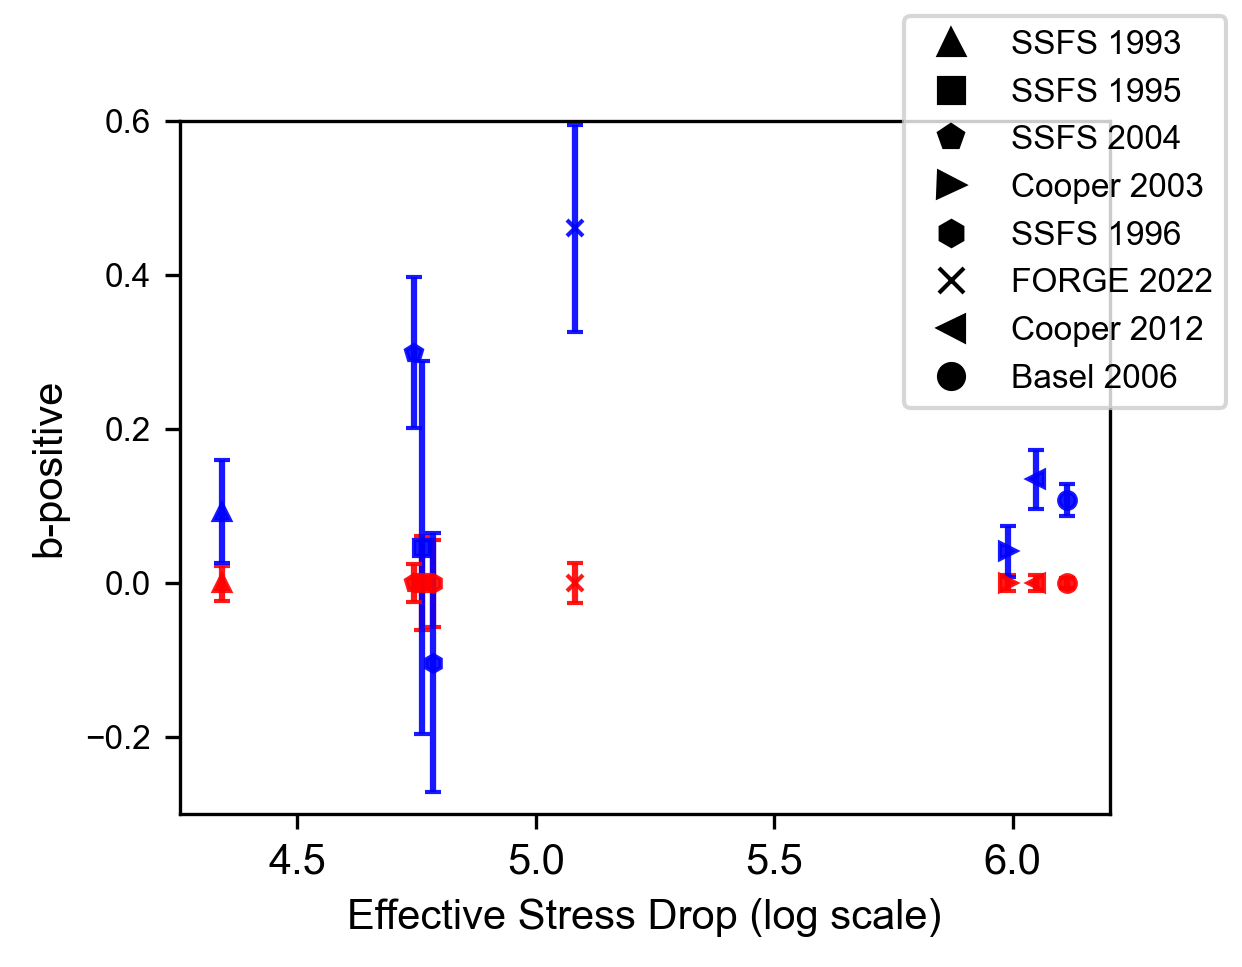

[[ 1.         -0.04391508]
 [-0.04391508  1.        ]]
-0.043915081730263324


In [27]:
import math
EStD = [21960.740145, 57624.369469, 60782.209671, 55483.963191, 976143.571657, 1121318.814135, 1302414.266182, 120615.140463]
lgEStD = [math.log10(x) for x in EStD]
fig, ax1 = plt.subplots(figsize=(4, 3),dpi=300)
plt.rcParams['font.family'] = 'Arial'
#plt.errorbar(ctc3, np.array(ctrb3)-np.array(ctrb3), yerr=ctrs3, fmt='o', capsize=4, markersize=3, color='r', alpha=0.9, label="Remaining Sequence b-pos")
#plt.errorbar(ctc3, np.array(ctpb3)-np.array(ctrb3), yerr=ctps3, fmt='o', capsize=5, markersize=3, color='b', alpha=0.9, label="Seismicity Front b-pos")

labels = ["SSFS 1993","SSFS 1995","SSFS 1996","SSFS 2004", "Cooper 2003","Cooper 2012","Basel 2006","FORGE 2022"]

# List of markers (enough variety for points)
markers = ['^', 's', 'h', 'p', '>', '<', 'o', 'x', '*', 'h', 'x', '+']

handles = []

for i in range(len(lgEStD)):
    plt.errorbar(lgEStD[i], np.array(ct['90rbp'][i])-np.array(ct['90rbp'][i]), yerr=ct['90rstdp'][i], marker=markers[i], capsize=2, markersize=4, color='r', alpha=0.9,label=None)
    plt.errorbar(lgEStD[i], np.array(ct['90pbp'][i])-np.array(ct['90rbp'][i]), yerr=ct['90pstdp'][i], marker=markers[i], capsize=2, markersize=4, color='b', alpha=0.9, label=None)

    handle = plt.Line2D([0], [0], marker=markers[i], color='w',markerfacecolor='k',markeredgecolor='k', markersize=6, label=label)
    handles.append(handle)

##### HERE CORRECT HERE
handNew = [handles[0],handles[1],handles[3],handles[4],handles[2],handles[-1],handles[5],handles[6]]
labNew = [labels[0],labels[1],labels[3],labels[4],labels[2],labels[-1],labels[5],labels[6]]
plt.xlabel("Effective Stress Drop (log scale)",fontsize=10)
plt.ylabel("b-positive",fontsize=10)
#plt.title("Seismicity Front (90th percentile) b-positive for Different EGS Sequences")
fig.legend(handles=handNew, labels=labNew, fontsize=8,loc='upper right')
#plt.legend(fontsize=8)
plt.yticks(fontsize=8) 
plt.ylim(-0.3,0.6)
#plt.xlim(-1.6,0.5)
#plt.xticks(x_positions, ctc2, rotation=20, ha='right', fontsize=8)
plt.show()
#fig.savefig(r"D:\Yihe\Manuscripting\seismicity front bp figure.png",bbox_inches='tight', pad_inches=0.05)
fig.savefig(r"C:\Users\Matthew Salinas\OneDrive - University of Southern California\Yihe\Manuscripting\Fig 7 New\fig 7 compare\fig 7 efSt Full.png",bbox_inches='tight', pad_inches=0.05)
#print(handles)

# Calculate the correlation coefficient matrix
como = np.corrcoef(lgEStD, np.array(ct['90pbp'])-np.array(ct['90rbp']))
print(como)
# Extract the Pearson correlation coefficient
pearco = como[0, 1]
print(pearco)

In [ ]:
##### NUMBER OF EVENTS? #####
1993 - 10080
1995 - 3470
1996 - 2859
2004 - 5861
2003 - 20362
2012 - 18147
2006 - 159706
2022 - 7295


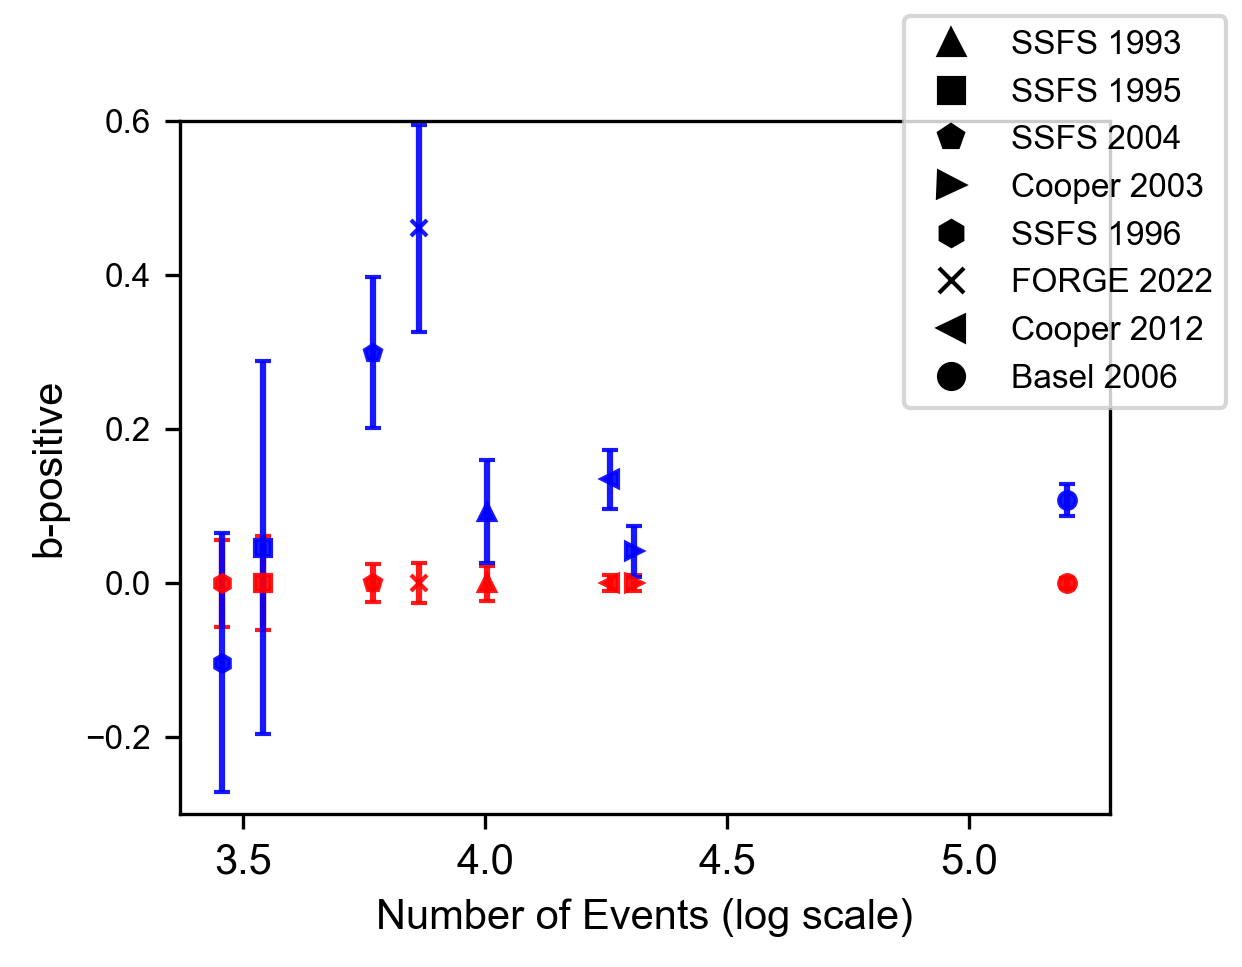

[[ 1.         -0.04391508]
 [-0.04391508  1.        ]]
-0.043915081730263324


In [28]:
import math
Ev = [10080, 3470, 2859, 5861, 20362, 18147, 159706, 7295]
lgEv = [math.log10(x) for x in Ev]
fig, ax1 = plt.subplots(figsize=(4, 3),dpi=300)
plt.rcParams['font.family'] = 'Arial'
#plt.errorbar(ctc3, np.array(ctrb3)-np.array(ctrb3), yerr=ctrs3, fmt='o', capsize=4, markersize=3, color='r', alpha=0.9, label="Remaining Sequence b-pos")
#plt.errorbar(ctc3, np.array(ctpb3)-np.array(ctrb3), yerr=ctps3, fmt='o', capsize=5, markersize=3, color='b', alpha=0.9, label="Seismicity Front b-pos")

labels = ["SSFS 1993","SSFS 1995","SSFS 1996","SSFS 2004", "Cooper 2003","Cooper 2012","Basel 2006","FORGE 2022"]

# List of markers (enough variety for points)
markers = ['^', 's', 'h', 'p', '>', '<', 'o', 'x', '*', 'h', 'x', '+']

handles = []

for i in range(len(lgEv)):
    plt.errorbar(lgEv[i], np.array(ct['90rbp'][i])-np.array(ct['90rbp'][i]), yerr=ct['90rstdp'][i], marker=markers[i], capsize=2, markersize=4, color='r', alpha=0.9,label=None)
    plt.errorbar(lgEv[i], np.array(ct['90pbp'][i])-np.array(ct['90rbp'][i]), yerr=ct['90pstdp'][i], marker=markers[i], capsize=2, markersize=4, color='b', alpha=0.9, label=None)

    handle = plt.Line2D([0], [0], marker=markers[i], color='w',markerfacecolor='k',markeredgecolor='k', markersize=6, label=label)
    handles.append(handle)

##### HERE CORRECT HERE
handNew = [handles[0],handles[1],handles[3],handles[4],handles[2],handles[-1],handles[5],handles[6]]
labNew = [labels[0],labels[1],labels[3],labels[4],labels[2],labels[-1],labels[5],labels[6]]
plt.xlabel("Number of Events (log scale)",fontsize=10)
plt.ylabel("b-positive",fontsize=10)
#plt.title("Seismicity Front (90th percentile) b-positive for Different EGS Sequences")
fig.legend(handles=handNew, labels=labNew, fontsize=8,loc='upper right')
#plt.legend(fontsize=8)
plt.yticks(fontsize=8) 
plt.ylim(-0.3,0.6)
#plt.xlim(-1.6,0.5)
#plt.xticks(x_positions, ctc2, rotation=20, ha='right', fontsize=8)
plt.show()
#fig.savefig(r"D:\Yihe\Manuscripting\seismicity front bp figure.png",bbox_inches='tight', pad_inches=0.05)
fig.savefig(r"C:\Users\Matthew Salinas\OneDrive - University of Southern California\Yihe\Manuscripting\Fig 7 New\fig 7 compare\fig 7 numEv.png",bbox_inches='tight', pad_inches=0.05)
#print(handles)

# Calculate the correlation coefficient matrix
como = np.corrcoef(lgEStD, np.array(ct['90pbp'])-np.array(ct['90rbp']))
print(como)
# Extract the Pearson correlation coefficient
pearco = como[0, 1]
print(pearco)

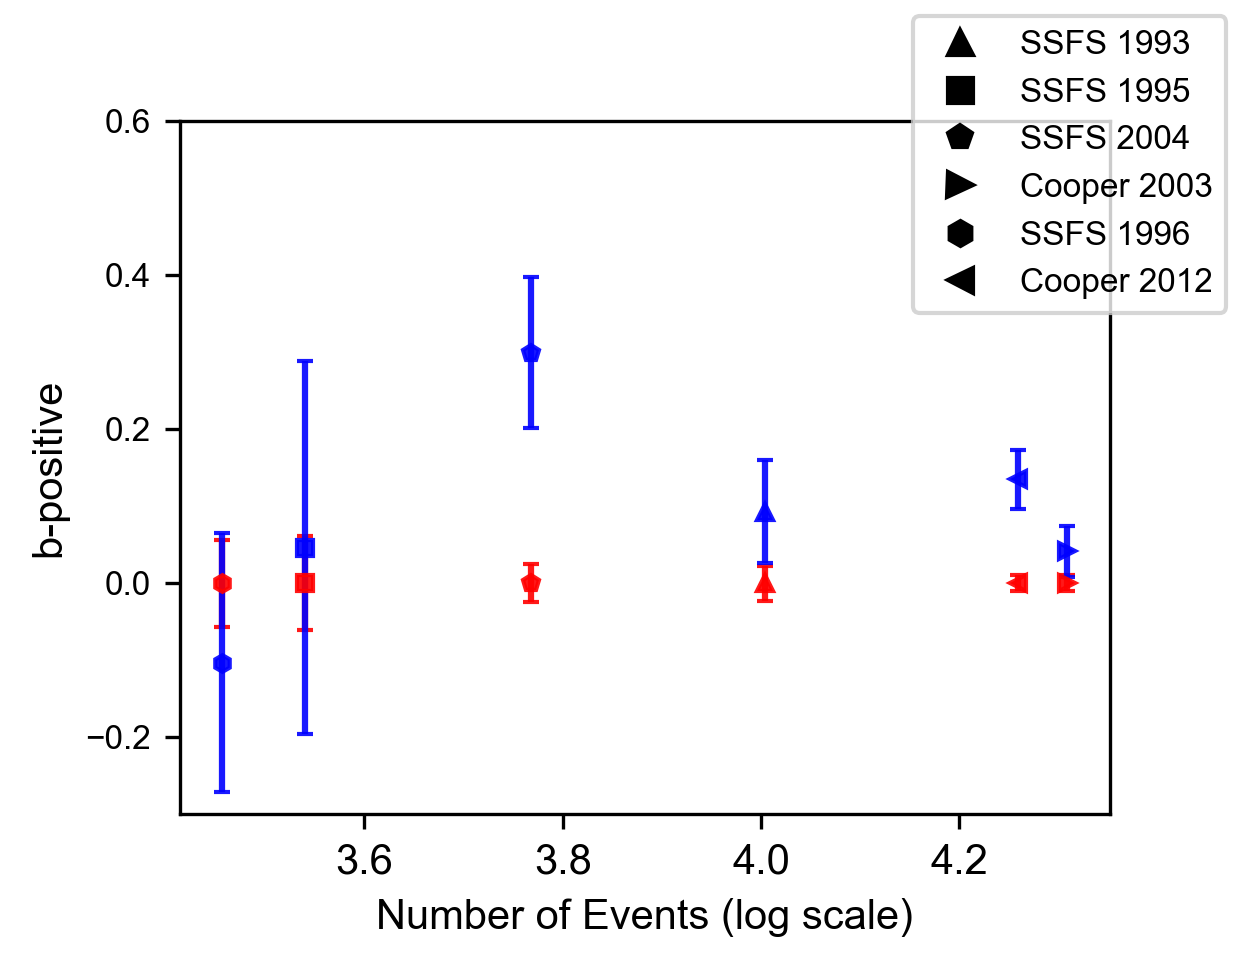

[[ 1.         -0.04391508]
 [-0.04391508  1.        ]]
-0.043915081730263324


In [23]:
import math
Ev = [10080, 3470, 2859, 5861, 20362, 18147]
lgEv = [math.log10(x) for x in Ev]
fig, ax1 = plt.subplots(figsize=(4, 3),dpi=300)
plt.rcParams['font.family'] = 'Arial'
#plt.errorbar(ctc3, np.array(ctrb3)-np.array(ctrb3), yerr=ctrs3, fmt='o', capsize=4, markersize=3, color='r', alpha=0.9, label="Remaining Sequence b-pos")
#plt.errorbar(ctc3, np.array(ctpb3)-np.array(ctrb3), yerr=ctps3, fmt='o', capsize=5, markersize=3, color='b', alpha=0.9, label="Seismicity Front b-pos")

labels = ["SSFS 1993","SSFS 1995","SSFS 1996","SSFS 2004", "Cooper 2003","Cooper 2012"]

# List of markers (enough variety for points)
markers = ['^', 's', 'h', 'p', '>', '<', 'o', 'x', '*', 'h', 'x', '+']

handles = []

for i in range(len(lgEv)):
    plt.errorbar(lgEv[i], np.array(ct['90rbp'][i])-np.array(ct['90rbp'][i]), yerr=ct['90rstdp'][i], marker=markers[i], capsize=2, markersize=4, color='r', alpha=0.9,label=None)
    plt.errorbar(lgEv[i], np.array(ct['90pbp'][i])-np.array(ct['90rbp'][i]), yerr=ct['90pstdp'][i], marker=markers[i], capsize=2, markersize=4, color='b', alpha=0.9, label=None)

    handle = plt.Line2D([0], [0], marker=markers[i], color='w',markerfacecolor='k',markeredgecolor='k', markersize=6, label=label)
    handles.append(handle)

##### HERE CORRECT HERE
handNew = [handles[0],handles[1],handles[3],handles[4],handles[2],handles[-1]]
labNew = [labels[0],labels[1],labels[3],labels[4],labels[2],labels[-1]]
plt.xlabel("Number of Events (log scale)",fontsize=10)
plt.ylabel("b-positive",fontsize=10)
#plt.title("Seismicity Front (90th percentile) b-positive for Different EGS Sequences")
fig.legend(handles=handNew, labels=labNew, fontsize=8,loc='upper right')
#plt.legend(fontsize=8)
plt.yticks(fontsize=8) 
plt.ylim(-0.3,0.6)
#plt.xlim(-1.6,0.5)
#plt.xticks(x_positions, ctc2, rotation=20, ha='right', fontsize=8)
plt.show()
#fig.savefig(r"D:\Yihe\Manuscripting\seismicity front bp figure.png",bbox_inches='tight', pad_inches=0.05)
#fig.savefig(r"C:\Users\Matthew Salinas\OneDrive - University of Southern California\Yihe\Manuscripting\Fig 7 New\fig 7 SI v2.png",bbox_inches='tight', pad_inches=0.05)
#print(handles)

# Calculate the correlation coefficient matrix
como = np.corrcoef(lgEStD, np.array(ct['90pbp'])-np.array(ct['90rbp']))
print(como)
# Extract the Pearson correlation coefficient
pearco = como[0, 1]
print(pearco)

#### Retry 11-27-2025 SI Full

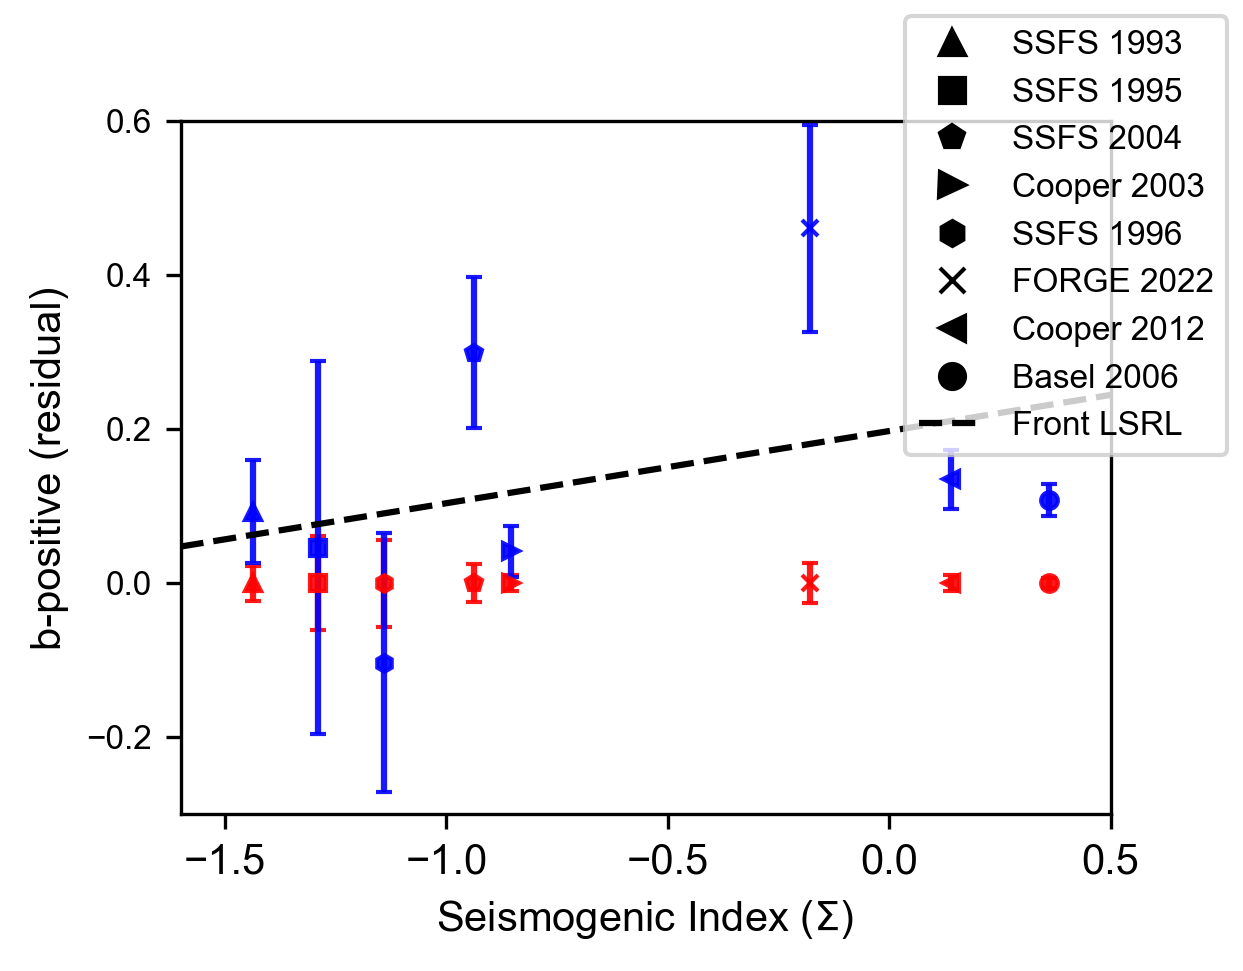

[[1.         0.37016954]
 [0.37016954 1.        ]]
0.3701695446737376


In [34]:
SI = [-1.4363, -1.2893, -1.1417, -0.9374, -0.8533, 0.1398, 0.3599, -0.1778]

fig, ax1 = plt.subplots(figsize=(4, 3),dpi=300)
plt.rcParams['font.family'] = 'Arial'
#plt.errorbar(ctc3, np.array(ctrb3)-np.array(ctrb3), yerr=ctrs3, fmt='o', capsize=4, markersize=3, color='r', alpha=0.9, label="Remaining Sequence b-pos")
#plt.errorbar(ctc3, np.array(ctpb3)-np.array(ctrb3), yerr=ctps3, fmt='o', capsize=5, markersize=3, color='b', alpha=0.9, label="Seismicity Front b-pos")

labels = ["SSFS 1993","SSFS 1995","SSFS 1996","SSFS 2004", "Cooper 2003","Cooper 2012","Basel 2006","FORGE 2022"]

# List of markers (enough variety for points)
markers = ['^', 's', 'h', 'p', '>', '<', 'o', 'x', '*', 'h', 'x', '+']

handles = []

for i in range(len(SI)):
    plt.errorbar(SI[i], np.array(ct['90rbp'][i])-np.array(ct['90rbp'][i]), yerr=ct['90rstdp'][i], marker=markers[i], capsize=2, markersize=4, color='r', alpha=0.9,label=None)
    plt.errorbar(SI[i], np.array(ct['90pbp'][i])-np.array(ct['90rbp'][i]), yerr=ct['90pstdp'][i], marker=markers[i], capsize=2, markersize=4, color='b', alpha=0.9, label=None)

    handle = plt.Line2D([0], [0], marker=markers[i], color='w',markerfacecolor='k',markeredgecolor='k', markersize=6, label=labels[i])
    handles.append(handle)

##### HERE CORRECT HERE
handNew = [handles[0],handles[1],handles[3],handles[4],handles[2],handles[-1],handles[5],handles[6]]
labNew = [labels[0],labels[1],labels[3],labels[4],labels[2],labels[-1],labels[5],labels[6]]
plt.xlabel("Seismogenic Index ($\Sigma$)",fontsize=10)
plt.ylabel("b-positive (residual)",fontsize=10)

m, b = np.polyfit(SI, np.array(ct['90pbp'])-np.array(ct['90rbp']),1)
x = np.linspace(-1.6,0.5,100)
y = m*x+b
lsrl, = plt.plot(x,y, linestyle="--", color = 'k',linewidth=1.5,label='LSRL')
handNew.append(lsrl)
labNew.append('Front LSRL')

#plt.title("Seismicity Front (90th percentile) b-positive for Different EGS Sequences")
fig.legend(handles=handNew, labels=labNew, fontsize=8,loc='upper right')
#plt.legend(fontsize=8)
plt.yticks(fontsize=8) 
plt.ylim(-0.3,0.6)
plt.xlim(-1.6,0.5)


#plt.xticks(x_positions, ctc2, rotation=20, ha='right', fontsize=8)
plt.show()
#fig.savefig(r"D:\Yihe\Manuscripting\seismicity front bp figure.png",bbox_inches='tight', pad_inches=0.05)
#fig.savefig(r"C:\Users\Matthew Salinas\OneDrive - University of Southern California\Yihe\Manuscripting\Fig 7 New\fig 7 compare\fig 7 SI Full.png",bbox_inches='tight', pad_inches=0.05)
#print(handles)
fig.savefig(r'/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe/Manuscripting/Fig 7 New/SI Full 11-28-25 v2',bbox_inches='tight', pad_inches=0.05)

# Calculate the correlation coefficient matrix
como = np.corrcoef(SI, np.array(ct['90pbp'])-np.array(ct['90rbp']))
print(como)
# Extract the Pearson correlation coefficient
pearco = como[0, 1]
print(pearco)